# Entropia Cruzada vs. Erro Médio Quadrático

Este material é um estudo dirigido que apresenta a teoria por trás do uso da função _softmax_ e da entropia cruzada como função de custo, quando projetamos redes neurais para lidar com problemas de classificação, com saída desejada no formato _one-hot_.

Esta teoria acompanha o [exercício F06](https://docs.google.com/forms/d/e/1FAIpQLSc1_kUBIi0Y1uBwC_p9YA7pcAHB6q9Z_QlpaYzQ6O4Y4iDLQQ/viewform?usp=sf_link).

## MSE

A função de custo mais conhecida é o Erro Médio Quadrático (MSE - Mean Squared Error). Esta é uma função simples de entender e derivar, e por isso é a que frequentemente aprendemos primeiro. Ela é dada pela fórmula:

$E_{MSE} = \frac{1}{2MN} \sum^M_{k=1} \sum^N_{i=1} (y_{ik} - \hat{y}_{ik})^2$

Que em palavras, significa que subtraímos o valor desejado do valor observado na saída, elevamos ao quadrado, e fazemos isso para cada saída $i$ e amostra $k$, somando e normalizando o resultado.

Essencialmente, se olharmos para uma única amostra $k$ específica temos:
$E_{MSE_k} = \frac{1}{2N} \sum^N_{i=1} (y_{i} - \hat{y}_{i})^2$

## CE

Entretanto para problemas de classificação, a função mais comumente empregada é a Entropia Cruzada (CE - Cross Entropy), que é definida como:

$E_{CE} = - \frac{1}{M} \sum_{k=1}^{M} \sum_{i=1}^{N} \hat{y}_{ik} \log(y_{ik})$

Olhando para uma amostra $k$ específica temos:

$E_{CE_k} = - \sum_{i=1}^{N} \hat{y}_{i} \log(y_{i})$

Este Jupyter Notebook é um estudo dirigido sobre o tema do uso de codificação _one-hot_, função _softmax_ e entropia cruzada, para problemas de classificação em redes neurais artificiais.

Nessas funções da CE acima, note que diferentemente do MSE, na CE não podemos trocar simetricamente $y$ por $\hat{y}$ na equação. Como $\hat{y}$ geralmente é um vetor no formato _one-hot_, isso causaria $\log 0$ que não tem valor definido (tende a infinito, conforme se aproxima de zero).

Neste Jupyter Notebook vamos examinar mais de perto a diferença entre essas duas funções de perda, quando empregadas em um problema de classificação. Abaixo ignoraremos o índice da amostra $k$ para simplificar a notação.

## One-Hot Encoding

Aqui vale lembrarmos que num problema de classificação entre $N$ possíveis classes, temos $N$ saídas, cada uma representando uma classe. As etiquetas (saídas desejadas) $\hat{y}$ são codificadas no formato _one-hot_, ou seja, são vetores de $N$ componentes, onde apenas a componente referente à classe desejada é $1$, sendo todas demais componentes igual a $0$. Essas etiquetas são comparadas com a saída calculada, através da função de custo.

<center><img src="https://drive.google.com/uc?id=1UZ8m6dnU9x7HGPWLZeGF3LgSTFxiBjhW" width="500" /></center>

## Softmax

Nesse tipo de problema a saída $y$ é ativada pela função _softmax_ onde:

$y_i = \frac{\exp(s_i)}{\sum_j\exp(s_j)}$

Isso resulta que todas saídas ficam contidas no intervalo entre $0$ e $1$, e somam exatamente no valor $1$, onde a saída maior se sobressai em relação às demais, já que a diferença aparece na potência da exponencial.

<img src="https://drive.google.com/uc?id=1d3sG1C3ON215tuhHmBR_fPpsKg1C6H0i" width="700" />

Nesse caso, quando formos comparar $y$ (gerado pela função _softmax_) e $\hat{y}$ (etiqueta no formato _one-hot_) que diferença faz usar MSE ou CE como função de custo?

## Código

Para examinar a diferença entre essas funções de custo, definimos estas funções no código abaixo.

In [ ]:
import numpy as np
np.set_printoptions(formatter={'float': '{: 0.1f}'.format})

In [ ]:
def mse(y,y_hat):
  ''' Erro médio quadrático
        y     : saída observada
        y_hat : saída desejada
  '''
  return 0.5*np.sum((y - y_hat)**2,axis=0)

In [ ]:
def ce(y,y_hat):
  ''' Entropia cruzada
        y     : saída observada
        y_hat : saída desejada
  '''
  return - np.sum(y_hat * np.log(y),axis=0)

Abaixo criamos uma matriz, onde cada coluna representa a simulação de uma saída _softmax_ possível, para um problema de classificação de duas classes. Na primeira linha os valores variam de 0,01 a 0,99 e na segunda linha os mesmos valores são subtraídos de 1,00 para garantir que a soma seja 1,00 em todas colunas.

In [ ]:
y0 = np.linspace(0.01,0.99,10)
y1 = 1.0 - y0
y = np.array([y0,y1])
print(y)

[[ 0.0  0.1  0.2  0.3  0.4  0.6  0.7  0.8  0.9  1.0]
 [ 1.0  0.9  0.8  0.7  0.6  0.4  0.3  0.2  0.1  0.0]]


Definimos abaixo nosso rótudo, a saída desejada

In [ ]:
y_hat = np.array([[1.0],[0.0]])
print(y_hat)

[[ 1.0]
 [ 0.0]]


Observando os valores de $y$ e de $\hat{y}$, vemos que os valores das colunas de $y$, olhando da esquerda para a direita, coluna a coluna, vão variando da classe incorreta $[0 \; 1]^T$ até a classe correta $[1 \; 0]^T$, pouco a pouco, criando valores intermediários em cada coluna de $y$.

Agora podemos calcular o MSE e a CE para esses dados e verificar como essas funções de custo se comportam para cada um desses valores intermediários.

In [ ]:
c0 = mse(y,y_hat)
print(c0)

[ 1.0  0.8  0.6  0.4  0.3  0.2  0.1  0.1  0.0  0.0]


In [ ]:
c1 = ce(y,y_hat)
print(c1)

[ 4.6  2.1  1.5  1.1  0.8  0.6  0.4  0.3  0.1  0.0]


Comparando as saídas acima já podemos perceber como os custos da CE são maiores que os custos do MSE para as colunas mais à esquerda, convergindo ambos para zero nas colunas mais à direita.

Plotando o gráfico abaixo, vemos como o CE penaliza de forma mais agressiva que o MSE os valores que representam classificações diferentes da desejada.

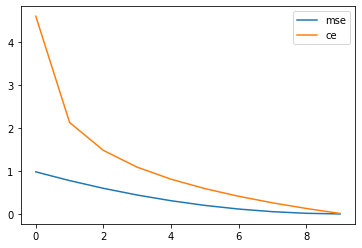

In [ ]:
plt.plot(c0,label='mse')
plt.plot(c1,label='ce')
plt.legend
plt.show()

Para observar mais de perto, vamos examinar as componentes individuais das saídas de ambas funções de custo. Para isso vamos colar abaixo as expressões principais, de dentro do somatório, e calcular a contribuição de cada saída no custo final.

Abaixo, para o MSE, vemos que ambas componentes dão resultados simétricos.

In [ ]:
(y - y_hat)**2

array([[ 1.0,  0.8,  0.6,  0.4,  0.3,  0.2,  0.1,  0.1,  0.0,  0.0],
       [ 1.0,  0.8,  0.6,  0.4,  0.3,  0.2,  0.1,  0.1,  0.0,  0.0]])

Já para o caso da CE, temos

In [ ]:
- y_hat * np.log(y)

array([[ 4.6,  2.1,  1.5,  1.1,  0.8,  0.6,  0.4,  0.3,  0.1,  0.0],
       [ 0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0]])

Veja acima como a segunda componente da saída, referente, neste caso, à classe incorreta, resulta sempre em custo zero. Para etiquetas no formato _one-hot_ custo é diferente de zero apenas na saída referente à classe desejada.

Isso fica evidente se pensar que cada componente $i$ é:

$E_{CE_i} = - \hat{y}_i \log (y_i)$

Então, no formato _one-hot_ apenas para a saída $i$ referente à classe correta temos que $\hat{y}_i$ = 1, resultando em $E_{CE_i} = - \log (y_i)$ para a classe correta, e $E_{CE_i} = 0$ para as classes incorretas (todas as demais).

<center><img src="https://drive.google.com/uc?id=1_6O7KyvjVZZOMS4OIDCU0JF8AH9Oj-Bu" width="250" /></center>

De fato, se consideramos saídas desejadas no formato _one-hot_, podemos ignorar todas as demais e nem fazer a soma, calculando apenas $- \log(y_i)$ para a classe correta. Isso é chamado de _categorical cross-entropy_.

Se focarmos na saída não nula, podemos plotar a função $-\log(y_i)$

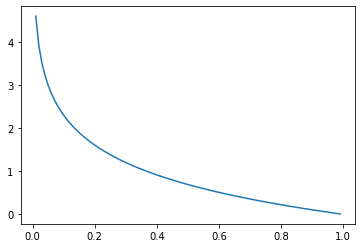

In [ ]:
x = np.linspace(0.01,0.99,100)
y = -np.log(x)
plt.plot(x,y)
plt.show()

Esta função acima mostra o quanto a CE penaliza o erro de classificação, de acordo com a probabilidade que a rede estimou na saída para a classe correta. Por exemplo, podemos ver que para $y_i \approx 0.2$ temos $E_{CE} \approx 1.6$. Isso significa que quando a rede atribui $20\%$ de probabilidade à classe correta (que deveria ser idealmente $100\%$), o custo é $1.6$. Note que não importam as probabilidades estimadas para as outras classes, já que as classes erradas não contribuem para o custo.

Veja que, como na saída _softmax_ a soma das saídas é sempre $1$, não importa o valor das saídas nas classes erradas. Mas quaisquer que sejam os valores nas saídas erradas, este valor acaba sendo subtraído da classe certa, que acaba indiretamente aumentando a entropia cruzada.

Quando menos probabilidade for atribuída à classe correta, mais nos movemos para a esquerda no gráfico acima, aumentando o custo de forma exponencial à medida que nos aproximamos da probabilidade zero.

PS.: Note que uma probabilidade zero causaria um erro no código, já que $\log 0$ não é definido. Entretanto, usando uma saída _softmax_ garantimos que isso não pode acontecer.

## Backpropagation usando MSE vs. CE

Na hora de implementar o algoritmo _backpropagation_, empregando uma saída _softmax_ e o erro CE implica em mudanças nas derivadas parciais referente aos parâmetros de peso e bias da última camada da rede neural.

Aqui vamos usar a mesma notação do vídeo abaixo.



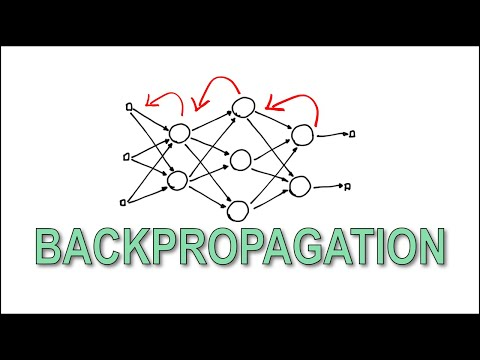

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('FvOY-IIhwHM')

Para a CE, a derivada parcial do custo em relação a $s^L$ é dada por:

$\delta^L =  \frac{\partial{E_{CE}}}{\partial{s^L}} = y - \hat{y}$

Esta é a mesma expressão usada para calcular os deltas no algoritmo backpropagation usando MSE, para casos onde não há função de ativação na última camada (no vídeo acima consideramos que há, [por isso o $\delta^L$ era ligeiramente diferente](https://youtu.be/FvOY-IIhwHM?t=1653)). Note que aqui os valores de $y$ são na realidade as saídas da função _softmax_ (não há função de ativação).

E para as demais camadas, seguimos como deduzido no vídeo

$\delta^l=(W^{l+1})^T\delta^{l+1}\odot\sigma'(s^l)$

Para calcular as derivadas parciais relativas aos pesos e biases de todas camadas (incluindo a última), podemos aplicar a regra da cadeia, da mesma forma que demonstrado no vídeo.

$\frac{\partial{E_{CE}}}{\partial{W^l}} = \frac{\partial{E_{CE}}}{\partial{s^l}} \frac{\partial{s^l}}{\partial{W^l}} = \delta^l \times \left(z^{l-1}\right)^T $

$\frac{\partial{E_{CE}}}{\partial{b^l}} = \frac{\partial{E_{CE}}}{\partial{s^l}} \frac{\partial{s^l}}{\partial{b^l}} = \delta^l $

PS.: Para uma dedução passo-a-passo da derivada da entropia cruzada com saída softmax, veja a página 3 [neste documento](https://www.ics.uci.edu/~pjsadows/notes.pdf) ou ainda [este vídeo](https://youtu.be/5-rVLSc2XdE). Mas cuidado, as notações nesses materiais são diferentes da nossa!

# Exercício F07

Implemente o treinamento de uma rede neural que utilize _softmax_ na saída e CE. Tome como ponto de partida o código disponível [neste Jupyter Notebook](https://colab.research.google.com/drive/1NruTndsSkIipkZGZt_p9Ojwb-sLejj9i?usp=sharing).

Este exercício deve ser entregue [neste link](https://docs.google.com/forms/d/e/1FAIpQLSc1_kUBIi0Y1uBwC_p9YA7pcAHB6q9Z_QlpaYzQ6O4Y4iDLQQ/viewform?usp=sf_link).